In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load in CSVs:
linkedin_df = pd.read_csv('Linkedin job listings information.csv')
indeed_df = pd.read_csv('Indeed job listings information.csv')
glassdoor_df = pd.read_csv('Glassdoor job listings information.csv')

# Confirm successful loading of sets
print("LinkedIn Data:")
print(linkedin_df.head())

print("\nIndeed Data:")
print(indeed_df.head())

print("\nGlassDoor Data:")
print(glassdoor_df.head())


LinkedIn Data:
                                                 url  job_posting_id  \
0  https://www.linkedin.com/jobs/view/4129831164/...      4129831164   
1  https://www.linkedin.com/jobs/view/4121271428/...      4121271428   
2  https://www.linkedin.com/jobs/view/4128604654/...      4128604654   
3  https://www.linkedin.com/jobs/view/4127880523/...      4127880523   
4  https://www.linkedin.com/jobs/view/4049869381/...      4049869381   

                                 job_title  \
0  Software Developer - Driver and Vehicle   
1                            API Developer   
2                           .Net Developer   
3                         Power BI Analyst   
4        Scala Software Engineer - Backend   

                          company_name  company_id              job_location  \
0  Canadian Bank Note Company, Limited      718150   Ottawa, Ontario, Canada   
1                          Venngo Inc.      126508  Toronto, Ontario, Canada   
2                            BLAZES

# Merging Indeed and LinkedIn Datasets

In [ ]:
# Rename columns in Indeed set to match the LinkedIn
indeed_df = indeed_df.rename(columns={
    'location': 'job_location',
    'description_text': 'job_summary',
    'job_type': 'job_employment_type'
})

# Select relevant columns in sets
linkedin_df = linkedin_df[['job_title', 'company_name', 'job_location', 'job_summary', 'job_employment_type']]
indeed_df = indeed_df[['job_title', 'company_name', 'job_location', 'job_summary', 'job_employment_type']]

# Concatenate sets
merged_df = pd.concat([linkedin_df, indeed_df], ignore_index=True)

# Check result
print(merged_df.head())  # Display the first few rows of the merged set
print(f"\nTotal rows after merge: {len(merged_df)}")


                                 job_title  \
0  Software Developer - Driver and Vehicle   
1                            API Developer   
2                           .Net Developer   
3                         Power BI Analyst   
4        Scala Software Engineer - Backend   

                          company_name              job_location  \
0  Canadian Bank Note Company, Limited   Ottawa, Ontario, Canada   
1                          Venngo Inc.  Toronto, Ontario, Canada   
2                            BLAZESOFT  Vaughan, Ontario, Canada   
3          Alquemy Search & Consulting  Calgary, Alberta, Canada   
4                               Avetta                    Canada   

                                         job_summary job_employment_type  
0  Description Internal Job Title : Software Deve...           Full-time  
1  Who we are At Venngo, we provide premium disco...           Full-time  
2  Join our dynamic and innovative gaming company...           Full-time  
3  Power BI An

# Adding In GlassDoor Dataset

In [ ]:
# Rename columns in Glassdoor set to match
glassdoor_df = glassdoor_df.rename(columns={
    'job_overview': 'job_summary',
    'pay_type': 'job_employment_type'
})

# Select relevant columns in Glassdoor set
glassdoor_df = glassdoor_df[['job_title', 'company_name', 'job_location', 'job_summary', 'job_employment_type']]

# Concatenate Glassdoor set with existing merged set
final_merged_df = pd.concat([merged_df, glassdoor_df], ignore_index=True)

# Check result
print(final_merged_df.head())  # Display the first few rows of merged set
print(f"\nTotal rows after adding Glassdoor: {len(final_merged_df)}")

                                 job_title  \
0  Software Developer - Driver and Vehicle   
1                            API Developer   
2                           .Net Developer   
3                         Power BI Analyst   
4        Scala Software Engineer - Backend   

                          company_name              job_location  \
0  Canadian Bank Note Company, Limited   Ottawa, Ontario, Canada   
1                          Venngo Inc.  Toronto, Ontario, Canada   
2                            BLAZESOFT  Vaughan, Ontario, Canada   
3          Alquemy Search & Consulting  Calgary, Alberta, Canada   
4                               Avetta                    Canada   

                                         job_summary job_employment_type  
0  Description Internal Job Title : Software Deve...           Full-time  
1  Who we are At Venngo, we provide premium disco...           Full-time  
2  Join our dynamic and innovative gaming company...           Full-time  
3  Power BI An

# Preliminary Visualizations

<ipython-input-11-616832c61831>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=employment_type_counts.index, y=employment_type_counts.values, palette="Blues_r")


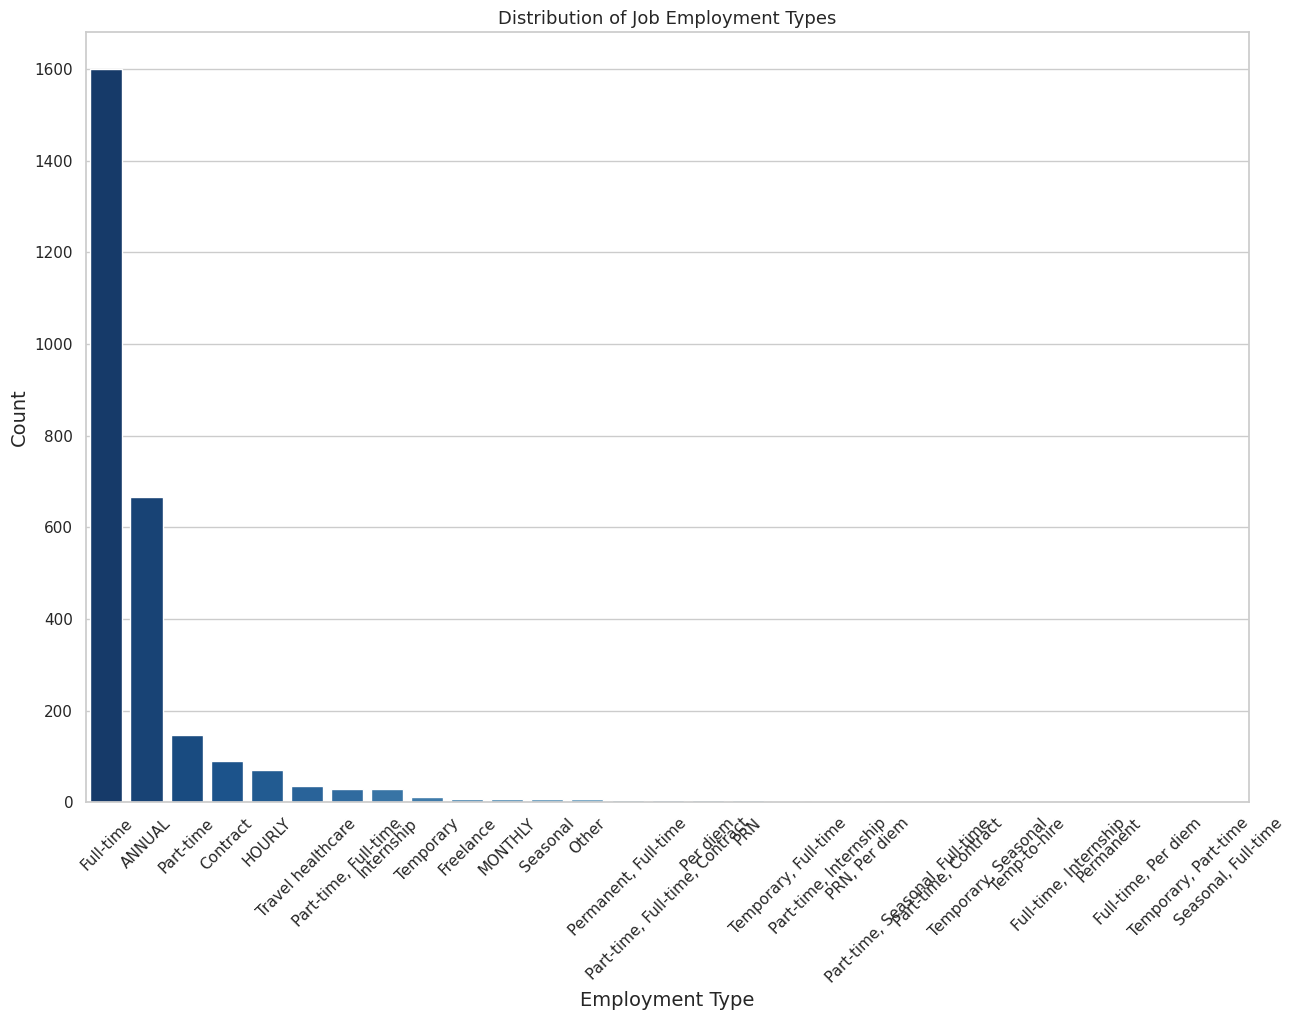

In [ ]:
# Begin graph
sns.set_theme(style="whitegrid")

# Counts of each job type
employment_type_counts = final_merged_df['job_employment_type'].value_counts()

# Plot bar chart
plt.figure(figsize=(15, 10))
sns.barplot(x=employment_type_counts.index, y=employment_type_counts.values, palette="Blues_r")

# Title and labels
plt.title("Distribution of Job Employment Types", fontsize=13)
plt.xlabel("Employment Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()

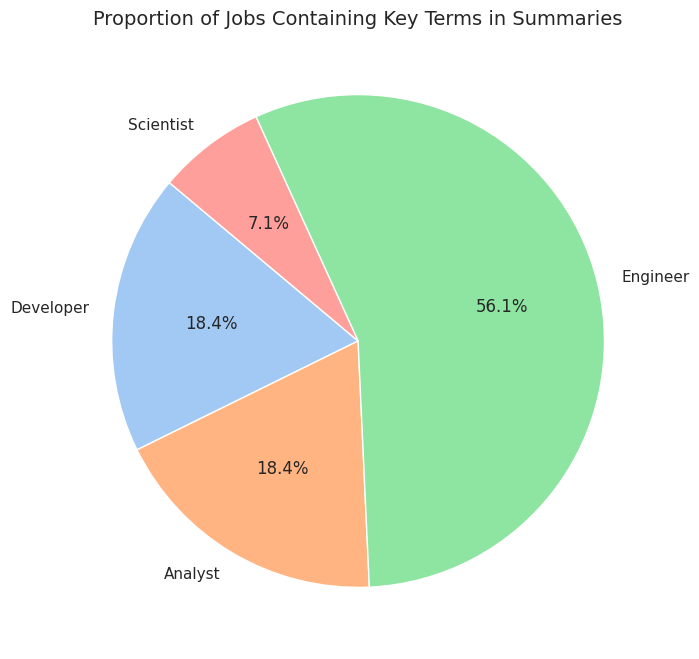

In [ ]:
# Make summaries lowercase for consistent search
final_merged_df['job_summary'] = final_merged_df['job_summary'].astype(str).str.lower()

# Keyword search
keywords = ['developer', 'analyst', 'engineer', 'scientist']

# Count num of each keyword in summaries
keyword_counts = {keyword.capitalize(): final_merged_df['job_summary'].str.contains(keyword).sum() for keyword in keywords}

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(keyword_counts.values(), labels=keyword_counts.keys(), autopct='%1.1f%%', colors=sns.color_palette("pastel"),
        startangle=140)

# Titles
plt.title("Proportion of Jobs Containing Key Terms in Summaries", fontsize=14)
plt.show()